In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kondapuramshivani/mall-customerscsv")

print("Path to dataset files:", path)

100%|██████████| 1.55k/1.55k [00:00<00:00, 537kB/s]

Extracting files...
Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\kondapuramshivani\mall-customerscsv\versions\1


In [31]:
import pandas as pd
data = pd.read_csv(path + "/Mall_Customers.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [33]:
data = data.drop(columns=["CustomerID"])
# Convert categorical data to numerical
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for column in data.select_dtypes(include=["object"]).columns:
    data[column] = le.fit_transform(data[column])

data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [35]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

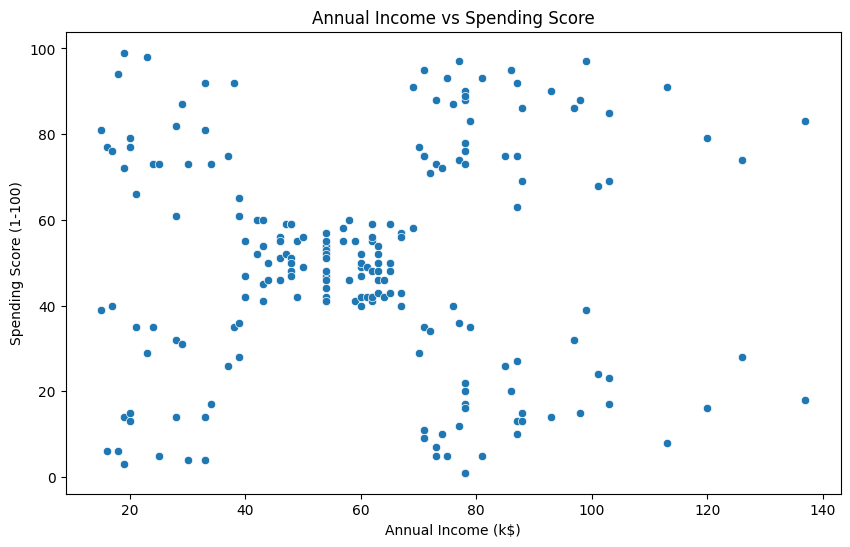

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Annual Income vs Spending Score")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

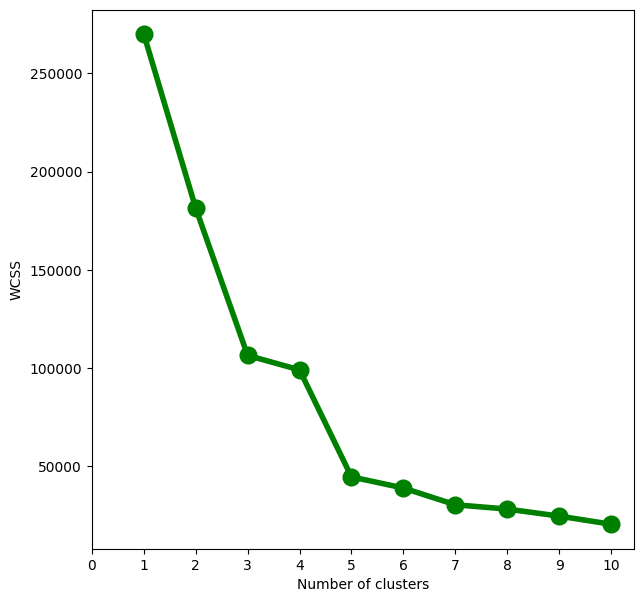

In [9]:
# find the optimal number of clusters using elbow method
from sklearn.cluster import KMeans
import numpy as np

WCSS = []
for i in range(1,11):
    model = KMeans(n_clusters = i,init = 'k-means++')
    model.fit(data)
    WCSS.append(model.inertia_)
fig = plt.figure(figsize = (7,7))
plt.plot(range(1,11),WCSS, linewidth=4, markersize=12,marker='o',color = 'green')
plt.xticks(np.arange(11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [28]:
model = KMeans(n_clusters = 5, init = "k-means++", max_iter = 100, n_init = 5, random_state = 42)
y_clusters = model.fit_predict(data)

C:\Users\engsm\AppData\Local\Temp\ipykernel_25892\81540577.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cluster'] = y_clusters


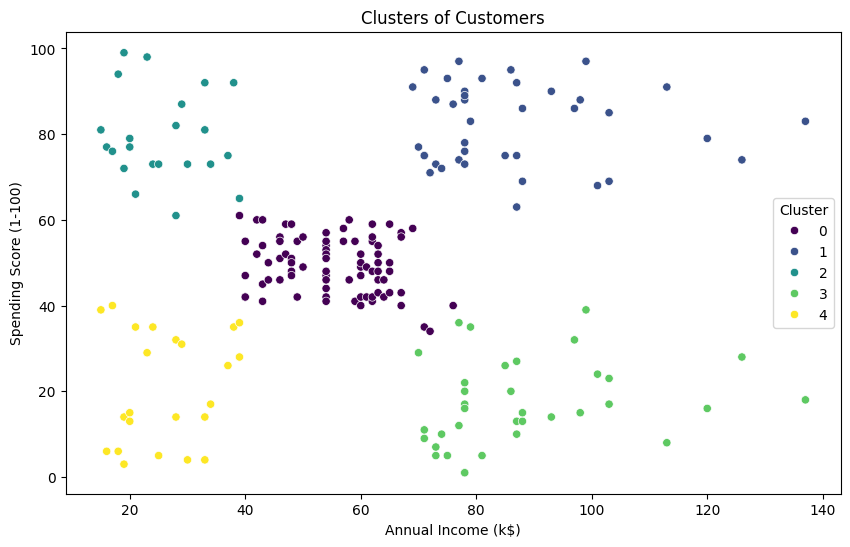

In [29]:
data['cluster'] = y_clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='cluster', palette='viridis')
plt.title("Clusters of Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

In [30]:
# Evaluate the clustering performance using silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data, y_clusters)
print(f"Silhouette Score: {silhouette_avg:.2f}")


Silhouette Score: 0.56


# Using Pycaret to run multiple experiments

In [ ]:
!pip install pycaret

^C


  ERROR: Failed to restore c:\users\engsm\miniconda3\lib\site-packages\plotly\
ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\engsm\miniconda3\Lib\site-packages\pip\_internal\cli\base_command.py", line 180, in exc_logging_wrapper
    status = run_func(*args)
             ^^^^^^^^^^^^^^^
  File "C:\Users\engsm\miniconda3\Lib\site-packages\pip\_internal\cli\req_command.py", line 245, in wrapper
    return func(self, options, args)
           ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\engsm\miniconda3\Lib\site-packages\pip\_internal\commands\install.py", line 452, in run
    installed = install_given_reqs(
                ^^^^^^^^^^^^^^^^^^^
  File "C:\Users\engsm\miniconda3\Lib\site-packages\pip\_internal\req\__init__.py", line 72, in install_given_reqs
    requirement.install(
  File "C:\Users\engsm\miniconda3\Lib\site-packages\pip\_internal\req\req_install.py", line 856, in install
    install_wheel(
  File "C:\Users\engsm\miniconda3\Lib\site-packages\pip\_intern

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/61.0 kB ? eta -:--:--
     ------ --------------------------------- 10.2/61.0 kB ? eta -:--:--
     ------------------- ------------------ 30.7/61.0 kB 445.2 kB/s eta 0:00:01
     -------------------------------------- 61.0/61.0 kB 466.1 kB/s eta 0:00:00
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 60.4/60.4 kB 3.3 MB/s eta 0:00:00
     ---------------------------------------- 0.0/169.7 kB ? eta -:--:--
     ------------------------- ------------ 112.6/169.7 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 169.7/169.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
INFO: pip is looking at multiple versions of category-encoders 

In [ ]:
# Apply clustering using PyCaret

from pycaret.clustering import *
from pycaret.utils import check_metric
from pycaret.datasets import get_data
from pycaret.datasets import get_config
from pycaret.datasets import save_config, load_config

# Load the dataset
dataset = get_data('mall_customers')
